In [399]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [400]:
#Datos
Δm=0.05/1000#kg
#Colisión elástica
datos1antes=pd.read_csv('Datos antes del choque(choque elastico).csv')
datos1despues=pd.read_csv('Datos despues del choque(choque elastico).csv')
#Colisión inelástica
datos2antes=pd.read_csv('Datos antes del choque(choque inelastico).csv')
datos2despues=pd.read_csv('Datos despues del choque(choque inelastico).csv')


print('La incertidumbre de la masa en todos los experimentos es(Δm) es ',Δm,'kg')
print('La masa de cada carro se da en cada inciso')

print('-----------------------------------------------------------------------------------')
print(' ')
print('    Datos choque elástico')
print(' ')
print('Los datos antes del choque son:')
print(' ')
print(datos1antes)
print('-----------------------------------')
print('Los datos después del choque son:')
print(' ')
print(datos1despues)

print('-----------------------------------------------------------------------------------------------------')
print(' ')
print('    Datos choque inelástico')
print(' ')
print('Los datos antes del choque son:')
print(' ')
print(datos2antes)
print('-----------------------------------')
print('Los datos después del choque son:')
print(' ')
print(datos2despues)
print('-----------------------------------------------------------------------------------------------------')



print('El signo de las cantidades vectoriales van de acuerdo a la siguiente convención:')
print(' ')
print('Postivo: derecha, negativo:izquierda')
print(' ')
print('El sistema de referencia usado es el lado izquierdo de la rampa')

La incertidumbre de la masa en todos los experimentos es(Δm) es  5e-05 kg
La masa de cada carro se da en cada inciso
-----------------------------------------------------------------------------------
 
    Datos choque elástico
 
Los datos antes del choque son:
 
   t(s)  xg(m)  xa(m)
0   0.0   0.06   0.85
1   0.1   0.10   0.82
2   0.2   0.13   0.79
3   0.3   0.17   0.76
4   0.4   0.20   0.74
5   0.5   0.24   0.71
6   0.6   0.27   0.68
7   0.7   0.30   0.65
-----------------------------------
Los datos después del choque son:
 
   t(s)  xg(m)  xa(m)
0   0.0   0.29   0.65
1   0.1   0.23   0.65
2   0.2   0.17   0.66
3   0.3   0.11   0.66
4   0.4   0.05   0.66
5   0.5   0.00   0.66
-----------------------------------------------------------------------------------------------------
 
    Datos choque inelástico
 
Los datos antes del choque son:
 
   t(s)  xg(m)  xa(m)
0   0.0   0.21   0.84
1   0.1   0.21   0.80
2   0.2   0.21   0.75
3   0.3   0.21   0.70
4   0.4   0.21   0.65
5   0.5   0

In [392]:
#Colisión elástica
mg=269.10/1000#kg
ma=832.40/1000#kg
print('La masa del carro gris(mg) es:',mg,'Kg')
print('La masa del carro azul(ma) es:',ma,'Kg')

La masa del carro gris(mg) es: 0.2691 Kg
La masa del carro azul(ma) es: 0.8324 Kg


        Hacemos una ajuste lineal antes del choque.
 
Hacemos una ajuste lineal para el carro gris.
 
El ajuste es x(t)=vag*t+x0ag,tiene como parametros:
 
vag=(0.34+-0.005)m/s, x0ag=(0.06+-0.002)m.
 
Por ende la velocidad del carro gris antes del choque (vag) es:( 0.34 +- 0.005 )m/s
----------------------------------
Hacemos una ajuste lineal para el carro azul.
 
El ajuste es x(t)=vaa*t+x0aa,tiene como parametros:
 
vaa=(-0.28+-0.004)m/s, x0ag=(0.85+-0.002)m.
 
Por ende la velocidad del carro azul antes del choque (vaa) es:( -0.28 +- 0.004 )m/s
----------------------------------
Gráficando y comparando con los puntos obtenidos por los datos, tenemos:


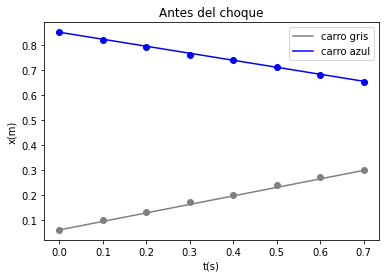

In [393]:
#Antes del choque
def func(x, m, b):
    return m*x+b

print('        Hacemos una ajuste lineal antes del choque.')
print(' ')
print('Hacemos una ajuste lineal para el carro gris.')
print(' ')
ajuste,covarianza= curve_fit(func,datos1antes['t(s)'].tolist(),datos1antes['xg(m)'].tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
vag=round(ajuste[0],2)
x0ag=round(ajuste[1],2)
Δvag=round(desviacionestandar[0],3)
Δx0ag=round(desviacionestandar[1],3)
print('El ajuste es x(t)=vag*t+x0ag,tiene como parametros:')
print(' ')
print(str('vag=(')+str(vag)+str('+-')+str(Δvag)+str(')m/s,'),str('x0ag=(')+str(x0ag)+str('+-')+str(Δx0ag)+str(')m.'))
print(' ')
print('Por ende la velocidad del carro gris antes del choque (vag) es:(',vag,'+-',Δvag,')m/s')
print('----------------------------------')

print('Hacemos una ajuste lineal para el carro azul.')
print(' ')
ajuste,covarianza= curve_fit(func,datos1antes['t(s)'].tolist(),datos1antes['xa(m)'].tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
vaa=round(ajuste[0],2)
x0aa=round(ajuste[1],2)
Δvaa=round(desviacionestandar[0],3)
Δx0aa=round(desviacionestandar[1],3)
print('El ajuste es x(t)=vaa*t+x0aa,tiene como parametros:')
print(' ')
print(str('vaa=(')+str(vaa)+str('+-')+str(Δvaa)+str(')m/s,'),str('x0ag=(')+str(x0aa)+str('+-')+str(Δx0aa)+str(')m.'))
print(' ')
print('Por ende la velocidad del carro azul antes del choque (vaa) es:(',vaa,'+-',Δvaa,')m/s')
print('----------------------------------')
print('Gráficando y comparando con los puntos obtenidos por los datos, tenemos:')

fig, ax = plt.subplots() 
x1=datos1antes['t(s)'].tolist()[0]
x2=datos1antes['t(s)'].tolist()[-1]
x=np.linspace(x1,x2,1000)
y1=func(x,vag,x0ag)
y2=func(x,vaa,x0aa)
ax.scatter(datos1antes['t(s)'],datos1antes['xg(m)'],color='gray')
ax.scatter(datos1antes['t(s)'],datos1antes['xa(m)'],color='blue')
ax.plot(x, y1,color='gray',label='carro gris')  
ax.plot(x, y2,color='blue', label='carro azul') 
ax.set_xlabel('t(s)')  
ax.set_ylabel('x(m)')  
ax.set_title('Antes del choque')
ax.legend()



        Hacemos una ajuste lineal después del choque.
 
Hacemos una ajuste lineal para el carro gris.
 
El ajuste es x(t)=vdg*t+x0dg,tiene como parametros:
 
vdg=(-0.59+-0.008)m/s, x0dg=(0.29+-0.002)m.
 
Por ende la velocidad del carro gris después del choque (vdg) es:( -0.59 +- 0.008 )m/s
----------------------------------
Hacemos una ajuste lineal para el carro azul.
 
El ajuste es x(t)=vda*t+x0da,tiene como parametros:
 
vda=(0.02+-0.008)m/s, x0dg=(0.65+-0.002)m.
 
Por ende la velocidad del carro azul después del choque (vda) es:( 0.02 +- 0.008 )m/s
----------------------------------
Gráficando y comparando con los puntos obtenidos por los datos, tenemos:


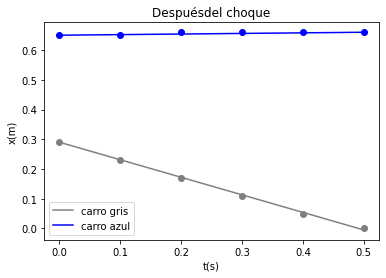

In [394]:
# Después del choque
def func(x, m, b):
    return m*x+b

print('        Hacemos una ajuste lineal después del choque.')
print(' ')
print('Hacemos una ajuste lineal para el carro gris.')
print(' ')
ajuste,covarianza= curve_fit(func,datos1despues['t(s)'].tolist(),datos1despues['xg(m)'].tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
vdg=round(ajuste[0],2)
xdg=round(ajuste[1],2)
Δv0dg=round(desviacionestandar[0],3)
Δx0dg=round(desviacionestandar[1],3)
print('El ajuste es x(t)=vdg*t+x0dg,tiene como parametros:')
print(' ')
print(str('vdg=(')+str(vdg)+str('+-')+str(Δvdg)+str(')m/s,'),str('x0dg=(')+str(x0dg)+str('+-')+str(Δx0dg)+str(')m.'))
print(' ')
print('Por ende la velocidad del carro gris después del choque (vdg) es:(',vdg,'+-',Δvdg,')m/s')
print('----------------------------------')

print('Hacemos una ajuste lineal para el carro azul.')
print(' ')
ajuste,covarianza= curve_fit(func,datos1despues['t(s)'].tolist(),datos1despues['xa(m)'].tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
vda=round(ajuste[0],2)
x0da=round(ajuste[1],2)
Δvda=round(desviacionestandar[0],3)
Δx0da=round(desviacionestandar[1],3)
print('El ajuste es x(t)=vda*t+x0da,tiene como parametros:')
print(' ')
print(str('vda=(')+str(vda)+str('+-')+str(Δvda)+str(')m/s,'),str('x0dg=(')+str(x0da)+str('+-')+str(Δx0da)+str(')m.'))
print(' ')
print('Por ende la velocidad del carro azul después del choque (vda) es:(',vda,'+-',Δvda,')m/s')
print('----------------------------------')
print('Gráficando y comparando con los puntos obtenidos por los datos, tenemos:')

fig, ax = plt.subplots() 
x1=datos1despues['t(s)'].tolist()[0]
x2=datos1despues['t(s)'].tolist()[-1]
x=np.linspace(x1,x2,1000)
y1=func(x,vdg,x0dg)
y2=func(x,vda,x0da)
ax.scatter(datos1despues['t(s)'],datos1despues['xg(m)'],color='gray')
ax.scatter(datos1despues['t(s)'],datos1despues['xa(m)'],color='blue')
ax.plot(x, y1,color='gray',label='carro gris')  
ax.plot(x, y2,color='blue', label='carro azul') 
ax.set_xlabel('t(s)')  
ax.set_ylabel('x(m)')  
ax.set_title('Despuésdel choque')
ax.legend()

In [395]:
# calculo momento y energía
mom0=round(ma*vaa+mg*vag,2)
Δmom01=abs(vaa*Δm)
Δmom02=abs(ma*Δvaa)
Δmom03=abs(vag*Δm)
Δmom04=abs(mg*Δvag)
Δmom0=round(Δmom01+Δmom02+Δmom03+Δmom04,3)

momf=round(ma*vda+mg*vdg,2)
Δmomf1=abs(vda*Δm)
Δmomf2=abs(ma*Δvda)
Δmomf3=abs(vdg*Δm)
Δmomf4=abs(mg*Δvdg)
Δmomf=round(Δmomf1+Δmomf2+Δmomf3+Δmomf4,3)


k0=round((1/2)*((ma*(vaa**2)+mg*(vag**2))),3)
Δk01=abs((1/2)*(vaa**2)*Δm)
Δk02=abs((ma*vaa*Δvaa))
Δk03=abs((1/2)*(vag**2)*Δm)
Δk04=abs((mg*vag*Δvag))
Δk0=round(Δk01+Δk02+Δk03+Δk04,3)

kf=round((1/2)*((ma*(vda**2)+mg*(vdg**2))),3)
Δkf1=abs((1/2)*(vda**2)*Δm)
Δkf2=abs((ma*vda*Δvda))
Δkf3=abs((1/2)*(vdg**2)*Δm)
Δkf4=abs((mg*vdg*Δvdg))
Δkf=round(Δkf1+Δkf2+Δkf3+Δkf4,3)

print('El momento inicial es:(',mom0,'+-',Δmom0,')kgm/s','y el momento final es:(',momf,'+-',Δmomf,')kgm/s')
print('La energía cinética inicial es:(',k0,'+-',Δk0,')J','y la energía cinética final es:(',kf,'+-',Δkf,')J')



El momento inicial es:( -0.14 +- 0.005 )kgm/s y el momento final es:( -0.14 +- 0.009 )kgm/s
La energía cinética inicial es:( 0.048 +- 0.001 )J y la energía cinética final es:( 0.047 +- 0.001 )J


In [387]:
#Colisión inelástica
mg=269.10/1000#kg
ma=582.40/1000#
print('La masa del carro gris(mg) es:',mg,'Kg')
print('La masa del carro azul(ma) es:',ma,'Kg')

La masa del carro gris(mg) es: 0.2691 Kg
La masa del carro azul(ma) es: 0.5824 Kg


        Hacemos una ajuste lineal antes del choque.
 
Hacemos una ajuste lineal para el carro gris.
 
El ajuste es x(t)=vag*t+x0ag,tiene como parametros:
 
vag=(0.0+-0.0)m/s, x0ag=(0.06+-0.002)m.
 
Por ende la velocidad del carro gris antes del choque (vag) es:( 0.0 +- 0.0 )m/s
----------------------------------
Hacemos una ajuste lineal para el carro azul.
 
El ajuste es x(t)=vaa*t+x0aa,tiene como parametros:
 
vaa=(-0.47+-0.009)m/s, x0ag=(0.84+-0.003)m.
 
Por ende la velocidad del carro azul antes del choque (vaa) es:( -0.47 +- 0.009 )m/s
----------------------------------
Gráficando y comparando con los puntos obtenidos por los datos, tenemos:


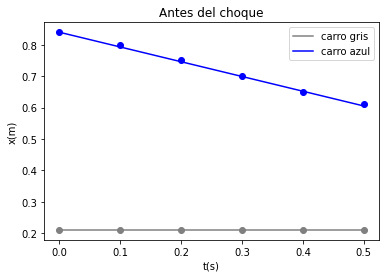

In [388]:
#Antes del choque
def func(x, m, b):
    return m*x+b

print('        Hacemos una ajuste lineal antes del choque.')
print(' ')
print('Hacemos una ajuste lineal para el carro gris.')
print(' ')
ajuste,covarianza= curve_fit(func,datos2antes['t(s)'].tolist(),datos2antes['xg(m)'].tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
vag=round(ajuste[0],2)
x0ag=round(ajuste[1],2)
Δvag=round(desviacionestandar[0],3)
Δx0ag=round(desviacionestandar[1],3)
print('El ajuste es x(t)=vag*t+x0ag,tiene como parametros:')
print(' ')
print(str('vag=(')+str(vag)+str('+-')+str(Δvag)+str(')m/s,'),str('x0ag=(')+str(xag)+str('+-')+str(Δxag)+str(')m.'))
print(' ')
print('Por ende la velocidad del carro gris antes del choque (vag) es:(',vag,'+-',Δvag,')m/s')
print('----------------------------------')

print('Hacemos una ajuste lineal para el carro azul.')
print(' ')
ajuste,covarianza= curve_fit(func,datos2antes['t(s)'].tolist(),datos2antes['xa(m)'].tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
vaa=round(ajuste[0],2)
x0aa=round(ajuste[1],2)
Δvaa=round(desviacionestandar[0],3)
Δx0aa=round(desviacionestandar[1],3)
print('El ajuste es x(t)=vaa*t+x0aa,tiene como parametros:')
print(' ')
print(str('vaa=(')+str(vaa)+str('+-')+str(Δvaa)+str(')m/s,'),str('x0ag=(')+str(x0aa)+str('+-')+str(Δx0aa)+str(')m.'))
print(' ')
print('Por ende la velocidad del carro azul antes del choque (vaa) es:(',vaa,'+-',Δvaa,')m/s')
print('----------------------------------')
print('Gráficando y comparando con los puntos obtenidos por los datos, tenemos:')

fig, ax = plt.subplots() 
x1=datos2antes['t(s)'].tolist()[0]
x2=datos2antes['t(s)'].tolist()[-1]
x=np.linspace(x1,x2,1000)
y1=func(x,vag,x0ag)
y2=func(x,vaa,x0aa)
ax.scatter(datos2antes['t(s)'],datos2antes['xg(m)'],color='gray')
ax.scatter(datos2antes['t(s)'],datos2antes['xa(m)'],color='blue')
ax.plot(x, y1,color='gray',label='carro gris')  
ax.plot(x, y2,color='blue', label='carro azul') 
ax.set_xlabel('t(s)')  
ax.set_ylabel('x(m)')  
ax.set_title('Antes del choque')
ax.legend()


        Hacemos una ajuste lineal después del choque.
 
Hacemos una ajuste lineal para los 2 carros que se mueven juntos.
 
El ajuste es x(t)=vdag*t+x0dag,tiene como parametros:
 
vdag=(-0.32+-0.003)m/s, x0dag=(0.56+-0.002)m.
 
Por ende la velocidad de los 2 carros es (vdag) es:( -0.32 +- 0.003 )m/s
----------------------------------
Gráficando y comparando con los puntos obtenidos por los datos, tenemos:


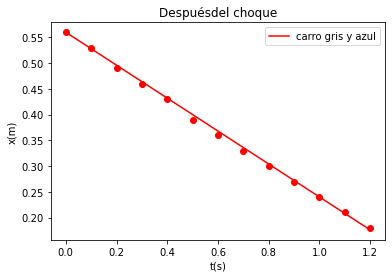

In [389]:
# Después del choque
def func(x, m, b):
    return m*x+b

print('        Hacemos una ajuste lineal después del choque.')
print(' ')
print('Hacemos una ajuste lineal para los 2 carros que se mueven juntos.')
print(' ')
ajuste,covarianza= curve_fit(func,datos2despues['t(s)'].tolist(),datos2despues['xg-a(m)'].tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
vdag=round(ajuste[0],2)
x0dag=round(ajuste[1],2)
Δvdag=round(desviacionestandar[0],3)
Δx0dag=round(desviacionestandar[1],3)
print('El ajuste es x(t)=vdag*t+x0dag,tiene como parametros:')
print(' ')
print(str('vdag=(')+str(vdag)+str('+-')+str(Δvdag)+str(')m/s,'),str('x0dag=(')+str(x0dag)+str('+-')+str(Δx0dag)+str(')m.'))
print(' ')
print('Por ende la velocidad de los 2 carros es (vdag) es:(',vdag,'+-',Δvdag,')m/s')
print('----------------------------------')
print('Gráficando y comparando con los puntos obtenidos por los datos, tenemos:')

fig, ax = plt.subplots() 
x1=datos2despues['t(s)'].tolist()[0]
x2=datos2despues['t(s)'].tolist()[-1]
x=np.linspace(x1,x2,1000)
y=func(x,vdag,x0dag)
ax.scatter(datos2despues['t(s)'],datos2despues['xg-a(m)'],color='red')
ax.plot(x, y,color='red',label='carro gris y azul')  
ax.set_xlabel('t(s)')  
ax.set_ylabel('x(m)')  
ax.set_title('Despuésdel choque')
ax.legend()

In [300]:
# calculo momento y energía
mom0=round(ma*vaa+mg*vag,2)
Δmom01=abs(vaa*Δm)
Δmom02=abs(ma*Δvaa)
Δmom03=abs(vag*Δm)
Δmom04=abs(mg*Δvag)
Δmom0=round(Δmom01+Δmom02+Δmom03+Δmom04,3)

momf=round((ma+mg)*vdag,2)
Δmomf1=abs(vdag*Δm)
Δmomf2=abs(vdag*Δm)
Δmomf3=abs((ma+mg)*Δvdag)
Δmomf=round(Δmomf1+Δmomf2+Δmomf3,3)


k0=round((1/2)*((ma*(vaa**2)+mg*(vag**2))),3)
Δk01=abs((1/2)*(vaa**2)*Δm)
Δk02=abs((ma*vaa*Δvaa))
Δk03=abs((1/2)*(vag**2)*Δm)
Δk04=abs((mg*vag*Δvag))
Δk0=round(Δk01+Δk02+Δk03+Δk04,3)

kf=round((1/2)*(ma+mg)*(vdag**2),3)
Δkf1=abs((1/2)*(vdag**2)*Δm)
Δkf2=abs((1/2)*(vdag**2)*Δm)
Δkf3=abs((ma+mg)*vdag*Δvdag)
Δkf=round(Δkf1+Δkf2+Δkf3,3)

print('El momento inicial es:(',mom0,'+-',Δmom0,')kgm/s','y el momento final es:(',momf,'+-',Δmomf,')kgm/s')
print('La energía cinética inicial es:(',k0,'+-',Δk0,')J','y la energía cinética final es:(',kf,'+-',Δkf,')J')

El momento inicial es:( -0.27 +- 0.005 )kgm/s y el momento final es:( -0.27 +- 0.003 )kgm/s
La energía cinética inicial es:( 0.064 +- 0.002 )J y la energía cinética final es:( 0.044 +- 0.001 )J
